In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('games.csv')
'''
id =                Game ID
rated =             Rated (T/F)
created_at =        Start Time
last_move_at =      End Time
turns =             Number of Turns
victory_status =    Game Status (how game was won)
winner =            Winner
increment_code =    Time Increment
white_id =          White Player ID
white_rating =      White Player Rating
black_id =          Black Player ID
black_rating =      Black Player Rating
moves =             All Moves in Standard Chess Notation
opening_eco =       Opening Eco (Standardised Code for any given opening)
opening_name =      Opening Name
opening_ply =       Opening Ply (Number of moves in the opening phase)
'''

'\nid =                Game ID\nrated =             Rated (T/F)\ncreated_at =        Start Time\nlast_move_at =      End Time\nturns =             Number of Turns\nvictory_status =    Game Status (how game was won)\nwinner =            Winner\nincrement_code =    Time Increment\nwhite_id =          White Player ID\nwhite_rating =      White Player Rating\nblack_id =          Black Player ID\nblack_rating =      Black Player Rating\nmoves =             All Moves in Standard Chess Notation\nopening_eco =       Opening Eco (Standardised Code for any given opening)\nopening_name =      Opening Name\nopening_ply =       Opening Ply (Number of moves in the opening phase)\n'

In [3]:
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [3]:
df.describe()

KeyboardInterrupt: 

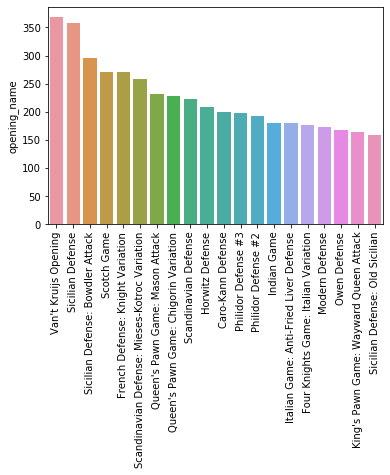

In [ ]:
#barplot of most common openings
pd.set_option("display.max_rows", None, "display.max_columns", None)
counts = df.opening_name.value_counts()[:20]

plot = sns.barplot(x = counts.index, y = counts)
plot.set_xticklabels(plot.get_xticklabels(), rotation = 90)
plt.show()

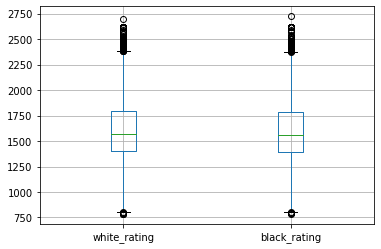

In [ ]:
df.boxplot(column=['white_rating','black_rating'])

In [ ]:
print(pd.pivot_table(df, index=['rated'], values=['white_rating']))
print(pd.pivot_table(df, index=['rated'], values=['black_rating']))

       white_rating
rated              
False   1594.685883
True    1597.102012
       black_rating
rated              
False   1569.497310
True    1593.503188


In [ ]:
print(pd.pivot_table(df, index=['winner'], values=['turns']))

            turns
winner           
black   60.724388
draw    86.157895
white   57.790221


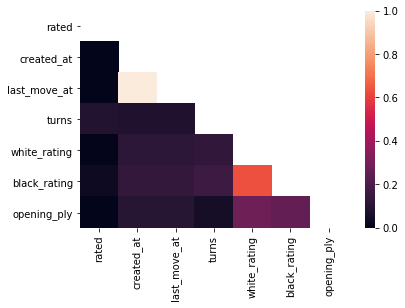

In [ ]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool)) 
sns.heatmap(corr, mask=mask)

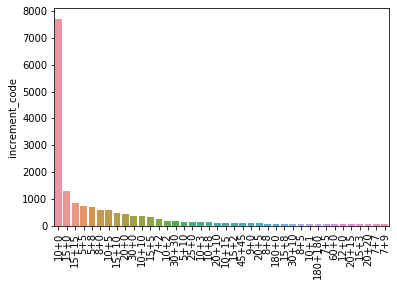

In [12]:
vc = df['increment_code'].value_counts()[:40]
chart = sns.barplot(x=vc.index, y=vc)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

In [16]:
df.columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

graph for id


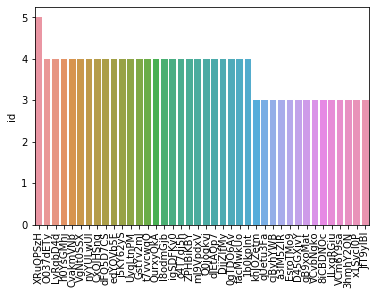

graph for rated


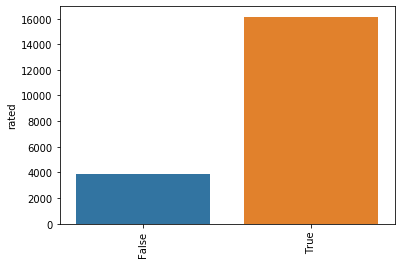

graph for turns


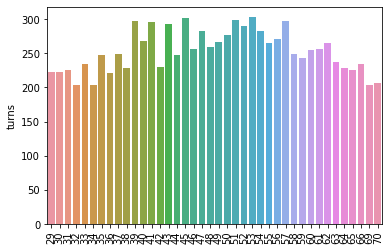

graph for victory_status


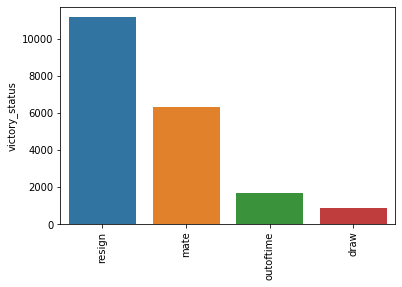

graph for winner


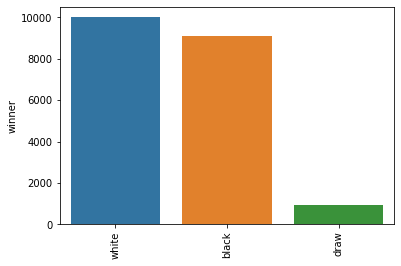

graph for increment_code


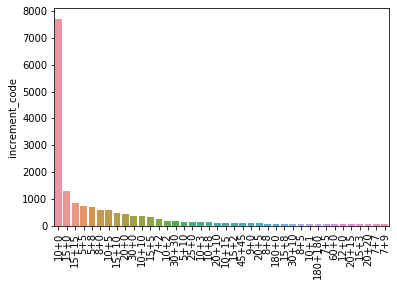

graph for opening_name


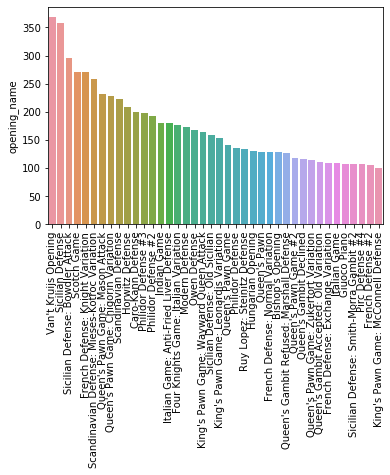

graph for white_rating


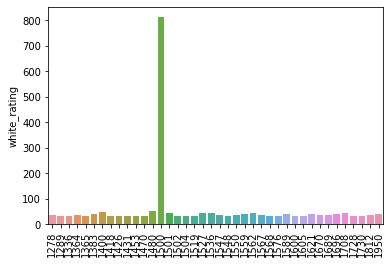

graph for black_rating


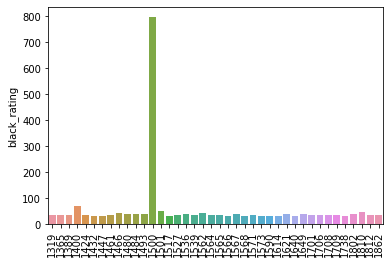

In [17]:
df_cats = df[['id', 'rated', 'turns', 'victory_status', 'winner', 'increment_code', 'opening_name',
              'white_rating', 'black_rating']]
for i in df_cats.columns:
    cat_num = df_cats[i].value_counts()[:40]
    print(f"graph for {i}")
    chart = sns.barplot(x = cat_num.index, y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()